In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

x_train = df_train[['mean_return', 'volatility']].values
y_train = df_train['label'].values

x_test = df_test[['mean_return', 'volatility']].values
y_test = df_test['label'].values

### Helper Functions

In [3]:
def buy_and_hold(df):
    """
    This function calculates the buy and hold strategy.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe containing the data.

    Returns
    -------
    profit : pandas.Series
        Series containing the buy and hold strategy profit.
    """
    df = pd.read_csv('../data/test.csv')
    
    ## Buy on the first day of 2020 and sell on the last dat of 2021
    start_money = 100

    ## Buy on the first day of 2020
    initial = 100 / df['mean_adj_close'].loc[df['Year'] == 2020].iloc[0]
    ## Sell on the last day of 2021
    cash = df['mean_adj_close'].loc[df['Year'] == 2021].iloc[-1] * initial

    profit = cash
    return profit

def my_trading_strategy(df, **kwargs):
    """
    This function calculates the trading strategy.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe containing the data.

    Returns
    -------
    profit : pandas.Series
        Series containing the trading strategy profit.
    """

    
    label = kwargs['labels']
    eval = kwargs['eval']

    df['labels'] = label
    
    initial: int('Stock') = 0
    cash: int('Starting Money') = 100
    profit: int = 0
    total_profit: int = 0
    sell: int = 0
    total_loss: int = 0
    success: int = 0
    fail: int = 0
    count: list = []

    if eval == 'test':
        for i in range(len(df)):
            """
            Start buying 
            """

            if(df['labels'].iloc[i] == 1 and initial == 0):
                initial = cash / df['mean_adj_close'].iloc[i]

            elif(df['labels'].iloc[i] != 1 and initial != 0):
                sell = initial * df['mean_adj_close'].iloc[i]
                if(sell > cash):
                    profit = sell - cash
                    success += 1
                    total_profit += profit
                else:
                    loss = cash - sell
                    fail += 1
                    total_loss += loss 
                cash = sell
                initial = 0

        print(f'Success: {success}')
        print(f'Fails: {fail}')

        return total_profit

    elif eval == 'train':
        for i in range(len(df)):
            """
            Start buying 
            """

            if(df['label'].iloc[i] == 1 and initial == 0):
                initial = cash / df['mean_adj_close'].iloc[i]

            elif(df['label'].iloc[i] != 1 and initial != 0):
                sell = initial * df['mean_adj_close'].iloc[i]
                if(sell > cash):
                    profit = sell - cash
                    success += 1
                    total_profit += profit
                else:
                    loss = cash - sell
                    fail += 1
                    total_loss += loss 
                cash = sell
                initial = 0

        print(f'Number of successfull trades: {success}')
        print(f'Number of failed trades: {fail}')

        return total_profit


In [4]:
print(f'Buy and hold profit = ${round(buy_and_hold(df_test))}')
print(f'My trading strategy profit = ${round(my_trading_strategy(df_test, labels="none", eval="train"))}')

Buy and hold profit = $2898
Number of successfull trades: 18
Number of failed trades: 8
My trading strategy profit = $6094


### Preparing data for training

In [5]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Nearest Centroid
----


In [6]:
nc = NearestCentroid()
nc.fit(x_train, y_train)
y_pred = nc.predict(x_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 2)}')

Accuracy: 0.93


In [41]:
green = nc.centroids_[0]
red = nc.centroids_[1]

Nearest Centroid for label 1: [0.35686353 0.37522066]
Nearest Centroid for label 0: [0.62219019 0.34934364]


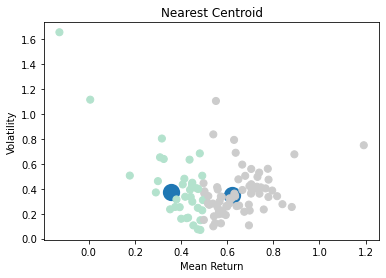

In [47]:
print(f'Nearest Centroid for label 1: {green}\nNearest Centroid for label 0: {red}')

plt.scatter(nc.centroids_[:, 0], nc.centroids_[:, 1], marker='o', s=150, linewidth=5)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='Pastel2')
plt.xlabel('Mean Return')
plt.ylabel('Volatility')
plt.title('Nearest Centroid')
plt.show()

In [45]:
dist_red = []
dist_green = []
for i in range(len(x_train)):
    temp = np.linalg.norm(x_train[i] - green)
    temp2 = np.linalg.norm(x_train[i] - red)
    dist_green.append(temp)
    dist_red.append(temp2)
    
print(f'Mean distance from green centroid: {round(np.mean(dist_green), 2)}')
print(f'Mean distance from red centroid: {round(np.mean(dist_red), 2)}')

Mean distance from green centroid: 0.26
Mean distance from red centroid: 0.26
